In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2

>Reading Images

In [71]:
img1 = plt.imread('Image_1.png')
img2 = plt.imread('Image_2.png')
img3 = plt.imread('Image_3.png')

>Plot input images

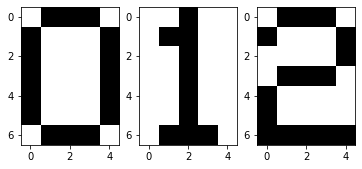

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.show()

> Preprocessing Data

In [72]:
# convert to one channel image
img1 = img1[:,:,0]
img2 = img2[:,:,0]
img3 = img3[:,:,0]

# reshape to a vector 
img1_r = np.reshape(img1,(35,1))
img2_r = np.reshape(img2,(35,1))
img3_r = np.reshape(img3,(35,1))

# bipolarization
img1_r[np.where(img1_r==0)] = -1
img2_r[np.where(img2_r==0)] = -1
img3_r[np.where(img3_r==0)] = -1

In [12]:
X1 = img1_r.copy()
X2 = img2_r.copy()
X3 = img3_r.copy()

#Part1 
>Hebbian Rule

> Compute Weights

In [73]:
W1 = np.zeros((35,35))
W2 = np.zeros((35,35))
W3 = np.zeros((35,35))
W1 = np.dot(X1,X1.T)
W2 = np.dot(X2,X2.T)
W3 = np.dot(X3,X3.T)
W = W1 + W2 + W3

In [14]:
W

array([[ 3., -1., -3., ..., -3., -3.,  1.],
       [-1.,  3.,  1., ...,  1.,  1.,  1.],
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       ...,
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       [-3.,  1.,  3., ...,  3.,  3., -1.],
       [ 1.,  1., -1., ..., -1., -1.,  3.]], dtype=float32)

>Modified Hebbian Rule

> Compute Weights

In [24]:
W1_m = np.zeros((35,35))
W2_m = np.zeros((35,35))
W3_m = np.zeros((35,35))
W1_m = np.dot(X1,X1.T)
W2_m = np.dot(X2,X2.T)
W3_m = np.dot(X3,X3.T)
W_m = W1_m + W2_m + W3_m
W_m = W_m - 3 * np.identity(35)

In [26]:
W_m

array([[ 0., -1., -3., ..., -3., -3.,  1.],
       [-1.,  0.,  1., ...,  1.,  1.,  1.],
       [-3.,  1.,  0., ...,  3.,  3., -1.],
       ...,
       [-3.,  1.,  3., ...,  0.,  3., -1.],
       [-3.,  1.,  3., ...,  3.,  0., -1.],
       [ 1.,  1., -1., ..., -1., -1.,  0.]])

##Part 2

In [31]:
def activation_function(X):
    if X > 0:
        X = 1
    elif X < 0:
        X = -1
    return X

>Compute Outputs

In [32]:
S1_n = np.dot(W.T,X1)
S2_n = np.dot(W.T,X2)
S3_n = np.dot(W.T,X3)

In [33]:
S1_new = np.zeros((35,1))
for i in range(35):
  S1_new[i] = activation_function(S1_n[i])
  
S2_new = np.zeros((35,1))
for i in range(35):
  S2_new[i] = activation_function(S2_n[i])
  
S3_new = np.zeros((35,1))
for i in range(35):
  S3_new[i] = activation_function(S3_n[i])

In [34]:
S1_new = np.reshape(S1_new, (7,5))
S2_new = np.reshape(S2_new, (7,5))
S3_new = np.reshape(S3_new, (7,5))

>Plot Outputs

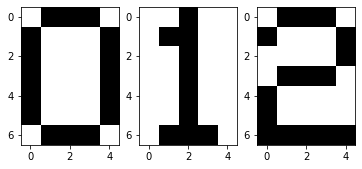

In [35]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='gray')

plt.show()

##Part 3

#20% noise

In [36]:
A_n = img1_r.copy()
B_n = img2_r.copy()
C_n = img3_r.copy()
A_noise = np.reshape(A_n,(35,1))
B_noise = np.reshape(B_n,(35,1))
C_noise = np.reshape(C_n,(35,1))
index_A = np.random.randint(35,size=(7,1))
index_B = np.random.randint(35,size=(7,1))
index_C = np.random.randint(35,size=(7,1))
for i in range(index_A.shape[0]):
  if A_noise[index_A[i], 0] == 1:
    A_noise[index_A[i], 0] = -1
  else:
    A_noise[index_A[i], 0] = 1
for j in range(index_B.shape[0]):
  if B_noise[index_B[j], 0] == 1:
    B_noise[index_B[j], 0] = -1
  else:
    B_noise[index_B[j], 0] = 1
for k in range(index_C.shape[0]):
  if C_noise[index_C[k], 0] == 1:
    C_noise[index_C[k], 0] = -1
  else:
    C_noise[index_C[k], 0] = 1
A_noise = np.reshape(A_noise,(7,5))
B_noise = np.reshape(B_noise,(7,5))
C_noise = np.reshape(C_noise,(7,5))

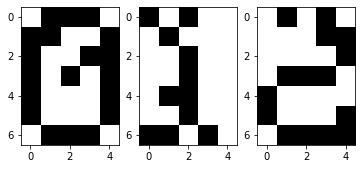

In [37]:
plt.subplot(1, 3, 1)
plt.imshow(A_noise, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(B_noise, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(C_noise, cmap='gray')

plt.show()

>Compute Outputs

In [38]:
X1_noise = A_noise.reshape(35,1)
X2_noise = B_noise.reshape(35,1)
X3_noise = C_noise.reshape(35,1)
S1=X1.reshape(35,1)
S2=X2.reshape(35,1)
S3=X3.reshape(35,1)

In [39]:
S1_noise = np.dot(W,X1_noise)
S2_noise = np.dot(W,X2_noise)
S3_noise = np.dot(W,X3_noise)

In [42]:
S1_new = np.zeros((35,1))
for i in range(35):
  S1_new[i] = activation_function(S1_noise[i])
  
S2_new = np.zeros((35,1))
for i in range(35):
  S2_new[i] = activation_function(S2_noise[i])
  
S3_new = np.zeros((35,1))
for i in range(35):
  S3_new[i] = activation_function(S3_noise[i])

In [43]:
S1_new = np.reshape(S1_new, (7,5))
S2_new = np.reshape(S2_new, (7,5))
S3_new = np.reshape(S3_new, (7,5))

>Plot Outputs

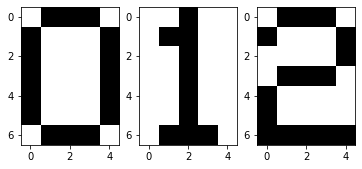

In [44]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(S2_new, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(S3_new, cmap='gray')

plt.show()

#80% noise

In [81]:
A_80 = img1_r.copy()
B_80 = img2_r.copy()
C_80 = img3_r.copy()
A_noise = np.reshape(A_80,(35,1))
B_noise = np.reshape(B_80,(35,1))
C_noise = np.reshape(C_80,(35,1))
index_A = np.random.randint(35,size=(28,1))
index_B = np.random.randint(35,size=(28,1))
index_C = np.random.randint(35,size=(28,1))
for i in range(index_A.shape[0]):
  if A_noise[index_A[i], 0] == 1:
    A_noise[index_A[i], 0] = -1
  else:
    A_noise[index_A[i], 0] = 1
for j in range(index_B.shape[0]):
  if B_noise[index_B[j], 0] == 1:
    B_noise[index_B[j], 0] = -1
  else:
    B_noise[index_B[j], 0] = 1
for k in range(index_C.shape[0]):
  if C_noise[index_C[k], 0] == 1:
    C_noise[index_C[k], 0] = -1
  else:
    C_noise[index_C[k], 0] = 1
A_noise_80 = np.reshape(A_noise,(7,5))
B_noise_80 = np.reshape(B_noise,(7,5))
C_noise_80 = np.reshape(C_noise,(7,5))

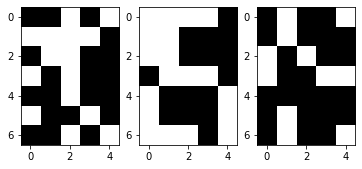

In [82]:
plt.subplot(1, 3, 1)
plt.imshow(A_noise_80, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(B_noise_80, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(C_noise_80, cmap='gray')
plt.show()

In [83]:
X1_noise_80 = A_noise_80.reshape(35,1)
X2_noise_80 = B_noise_80.reshape(35,1)
X3_noise_80 = C_noise_80.reshape(35,1)

S1_80=X1.reshape(35,1)
S2_80=X2.reshape(35,1)
S3_80=X3.reshape(35,1)


In [84]:
S1_noise_80 = np.dot(W,X1_noise_80)
S2_noise_80 = np.dot(W,X2_noise_80)
S3_noise_80 = np.dot(W,X3_noise_80)

In [85]:
S1_new_80 = np.zeros((35,1))
for i in range(35):
  S1_new_80[i] = activation_function(S1_noise_80[i])
  
S2_new_80 = np.zeros((35,1))
for i in range(35):
  S2_new_80[i] = activation_function(S2_noise_80[i])
  
S3_new_80 = np.zeros((35,1))
for i in range(35):
  S3_new_80[i] = activation_function(S3_noise_80[i])

In [86]:
S1_new_80 = np.reshape(S1_new_80, (7,5))
S2_new_80 = np.reshape(S2_new_80, (7,5))
S3_new_80 = np.reshape(S3_new_80, (7,5))

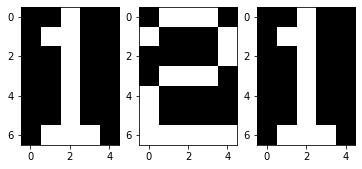

In [87]:
plt.subplot(1, 3, 1)
plt.imshow(S1_new_80, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(S2_new_80, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(S3_new_80, cmap='gray')

plt.show()